## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. 

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

This results in a partitioning of the data space into Voronoi cells.

In [1]:
N=int(7)
M=int(25)

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
seednum=0
np.random.seed(seednum)

In [4]:
from sklearn.cluster import KMeans

In [5]:
K1=[]
for i in range(-M, M):
    K1 = K1+[[i,i]]
    K1 = K1+[[0,i]]
    K1 = K1+[[i,0]]
    K1 = K1+[[-i,i]]
#print(K1)

In [6]:
X = np.array(K1)

In [7]:
K2=[]
for i in range(-M, M):
    for j in range(-M, M):
        K2 = K2+[[i,j]]
#print(K2)

In [8]:
T = np.array(K2)

## KMeans One

In [9]:
km1 = KMeans(n_clusters=N, 
                random_state=seednum, 
                init='k-means++',
                algorithm='auto',
                tol=1e-06,
                max_iter=1000,
                n_jobs=-1,
                n_init=100,
                verbose=True
               )

In [10]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=7, n_init=100, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=1e-06, verbose=True)

In [11]:
print(km1.get_params(deep=True))

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 100, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 1e-06, 'verbose': True}


In [12]:
print(km1.n_iter_)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.9



In [13]:
print(km1.labels_)

[4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4
 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 4 6 0 1 0 6 0 1 0 6 0 1 0 6 0 1 0 3 0 3 0 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 2 3 3 5 2 3 3 5 2 3 3 5 2 5 3 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5]


In [14]:
z1 = km1.predict(X)

In [15]:
p1 = km1.predict(T)

## KMeans Two

In [16]:
km2 = KMeans(n_clusters=N, 
                random_state=seednum, 
                init='random',
                algorithm='auto',
                tol=1e-06,
                max_iter=1000,
                n_jobs=-1,
                n_init=100,
                verbose=True
               )

In [17]:
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=7, n_init=100, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=1e-06, verbose=True)

In [18]:
print(km2.get_params(deep=True))

{'algorithm': 'auto', 'copy_x': True, 'init': 'random', 'max_iter': 1000, 'n_clusters': 7, 'n_init': 100, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 1e-06, 'verbose': True}


In [19]:
print(km2.n_iter_)

9


In [20]:
print(km2.labels_)

[4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4
 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 4 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 6 0 0 5 6 0 0 5 6 0 0 5 6 5 6 5
 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5 6
 5 6 5 6 5 6 5 6 5 6 5 6 5 6 5]


In [21]:
z2 = km2.predict(X)

In [22]:
p2 = km2.predict(T)

## Plot Results - KMeans One

In [23]:
#for i in range(X.shape[0]):
#    print(X[i], z1[i])

In [24]:
print(X.shape, z1.shape)

(200, 2) (200,)


In [25]:
x1, y1=zip(*X)
c1=z1[:]
#print(x1,y1,c1)

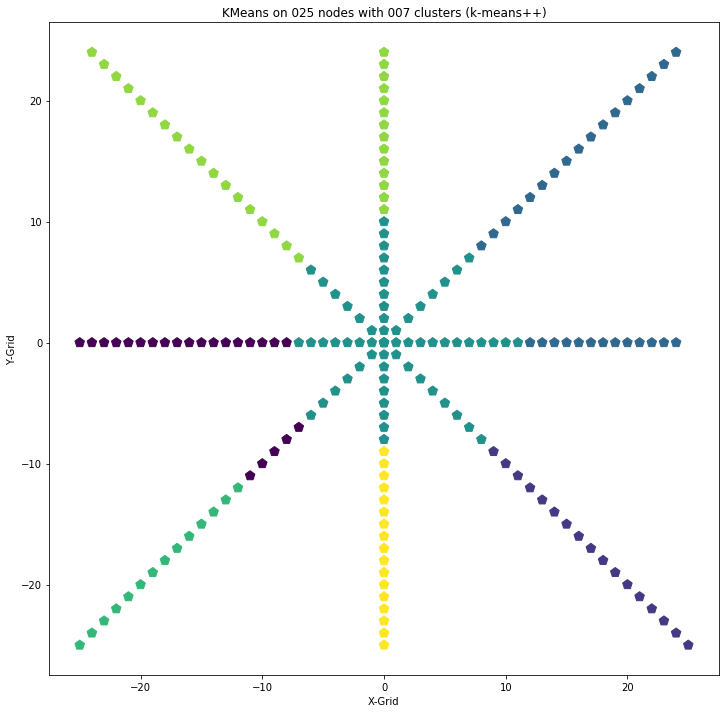

In [26]:
fig1=plt.figure(figsize=(12, 12))
titlename = 'KMeans on %03d nodes with %03d clusters (k-means++)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x1, y1,marker='p',c=c1, s=100)
plt.show()

In [27]:
#for i in range(T.shape[0]):
#    print(T[i], p1[i])

In [28]:
x2, y2= zip(*T)
c2=p1[:]

In [29]:
c2.shape[0]

2500

In [30]:
g1=pd.DataFrame(c2)
g1.columns=['Cluster']
gc1=g1['Cluster'].value_counts()
for i in range(gc1.shape[0]):
    print('Cluster %d : %d' % (i+1,gc1[i]))

Cluster 1 : 348
Cluster 2 : 337
Cluster 3 : 473
Cluster 4 : 316
Cluster 5 : 252
Cluster 6 : 479
Cluster 7 : 295


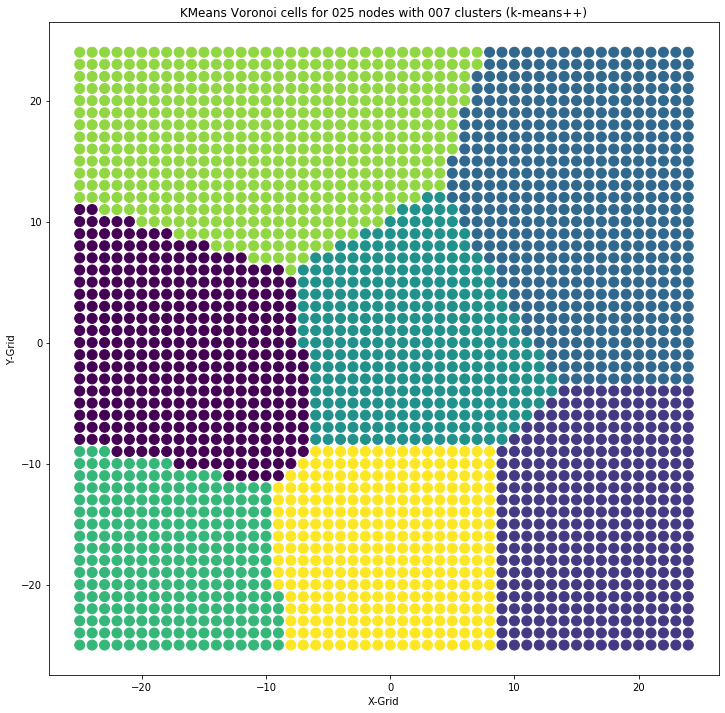

In [31]:
fig2=plt.figure(figsize=(12, 12))
titlename = 'KMeans Voronoi cells for %03d nodes with %03d clusters (k-means++)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x2, y2,marker="o",c=c2, s=100)
plt.show()

## Plot Results - KMeans Two

In [32]:
#for i in range(X.shape[0]):
#    print(X[i], z2[i])

In [33]:
print(X.shape, z2.shape)

(200, 2) (200,)


In [34]:
x1, y1=zip(*X)
c1=z2[:]
#print(x1,y1,c1)

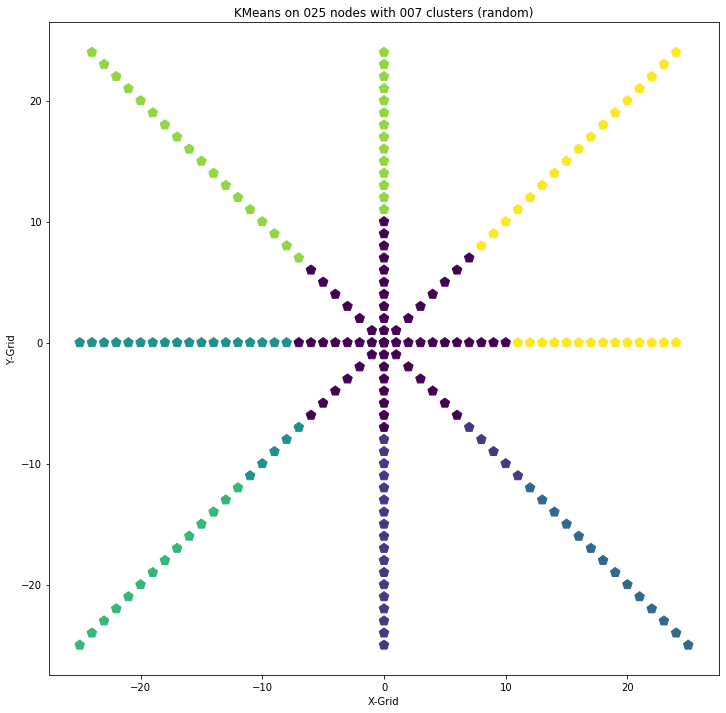

In [35]:
fig3=plt.figure(figsize=(12, 12))
titlename = 'KMeans on %03d nodes with %03d clusters (random)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x1, y1,marker='p',c=c1, s=100)
plt.show()

In [36]:
#for i in range(T.shape[0]):
#    print(T[i], p2[i])

In [37]:
x2, y2= zip(*T)
c2=p2[:]

In [38]:
c2.shape[0]

2500

In [39]:
g2=pd.DataFrame(c2)
g2.columns=['Cluster']
gc2=g2['Cluster'].value_counts()
for i in range(gc2.shape[0]):
    print('Cluster %d : %d' % (i+1,gc2[i]))

Cluster 1 : 296
Cluster 2 : 334
Cluster 3 : 289
Cluster 4 : 346
Cluster 5 : 269
Cluster 6 : 474
Cluster 7 : 492


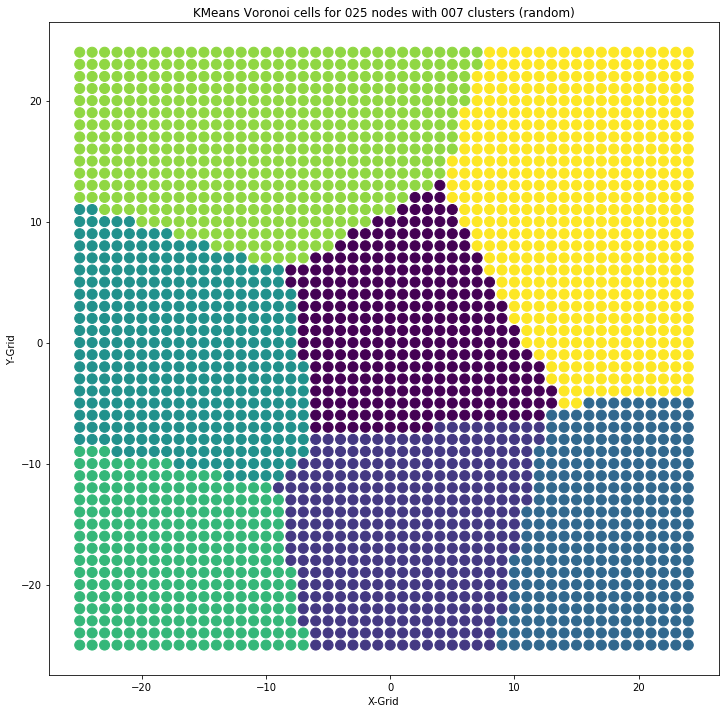

In [40]:
fig4=plt.figure(figsize=(12, 12))
titlename = 'KMeans Voronoi cells for %03d nodes with %03d clusters (random)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x2, y2,marker="o",c=c2, s=100)
plt.show()

## Save Results - KMeans

In [41]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
figname='Chapter-006-Example-002-%03d-01.jpg' % (N)    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig1.savefig(imagename, bbox_inches='tight')

figname='Chapter-006-Example-002-%03d-02.jpg' % (N)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig2.savefig(imagename, bbox_inches='tight') 
    
figname='Chapter-006-Example-002-%03d-03.jpg' % (N)    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig3.savefig(imagename, bbox_inches='tight')

figname='Chapter-006-Example-002-%03d-04.jpg' % (N)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig4.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 06


## Done

In [42]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 19:49:02.574031
